In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [3]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC','NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df_air=pd.read_csv('/AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,na_values=-200,usecols=use)
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [6]:
df_air.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [7]:
#drop end rows with NaN values
df_air.dropna(how='all',inplace=True)
#drop RH NAN rows
df_air.dropna(thresh=10,axis=0,inplace=True)

In [8]:
df_air.shape

(8991, 15)

In [9]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [10]:
#Split hour from time into new column
df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

In [11]:
print('Count of missing values:\n',df_air.shape[0]-df_air.count())

Count of missing values:
 DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


In [12]:
df_air['DATE']=pd.to_datetime(df_air.DATE, format='%m/%d/%Y')   #Format date column

In [13]:
df_air.set_index('DATE',inplace=True)

In [14]:
df_air['MONTH']=df_air.index.month     #Create month column (Run once)
df_air.reset_index(inplace=True)
#df_air.head()

In [15]:
df_air.drop('NMHC_GT',axis=1,inplace=True)    #drop col

In [16]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [17]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


In [18]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

In [19]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [21]:
#plot all X-features against output variable RH
col_=df_air.columns.tolist()[2:]
X=df_air[col_].drop('RH',1)     #X-input features
y=df_air['RH']                    #y-input features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
ss=StandardScaler()     #initiatilise

In [23]:
X_std=ss.fit_transform(X)     #apply stardardisation

In [24]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

In [25]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6293, 13)
Test data size: (2698, 13)


In [26]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [27]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 49.21763046095795
--------------------------------
Slope:


[('CO_GT', -1.7367447259994717),
 ('PT08_S1_CO', 3.403774186526405),
 ('C6H6_GT', -5.697492496373158),
 ('PT08_S2_NMHC', -1.1962342483257367),
 ('NOX_GT', 3.503689967134088),
 ('PT08_S3_NOX', -0.7001846893676722),
 ('NO2_GT', -1.1080890551814404),
 ('PT08_S4_NO2', 6.877135083115169),
 ('PT08_S5_O3', -1.2881546341603596),
 ('T', -20.184910618985878),
 ('AH', 12.06338765067106),
 ('HOUR', -0.6178414096506902),
 ('MONTH', 1.339928337474733)]

ValueError: ignored

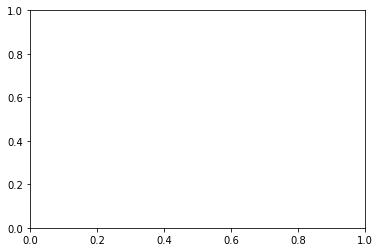

In [28]:
x_train, x_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
plt.scatter(X_train, y_train, color='orange')
plt.xlable("x Lable")
plt.ylable("Y Lable")
plt.title("Data")
plt.show()